<a href="https://colab.research.google.com/github/khanhvy31/khanhvy31-BreastCancer_DeepLearning/blob/main/Breast_Cancer_Normalize_CNN_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

##Import all packages need

In [ ]:
import pandas as pd
import warnings
from ast import literal_eval
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from collections import Counter
from PIL import Image
from skimage import io, transform
import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir content

In [ ]:

!cp /content/drive/MyDrive/BMIN_Project/Dataset/archive.zip content

In [ ]:
!unzip /content/drive/MyDrive/BMIN_Project/Dataset/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: 63617_159110654.png     
  inflating: 63617_1855699072.png    
  inflating: 63617_1917877119.png    
  inflating: 63617_887426674.png     
  inflating: 63623_1186739164.png    
  inflating: 63623_1657034655.png    
  inflating: 63623_335778602.png     
  inflating: 63623_625719002.png     
  inflating: 63626_1154699412.png    
  inflating: 63626_549972940.png     
  inflating: 63626_599167493.png     
  inflating: 63626_939566995.png     
  inflating: 63627_1214214469.png    
  inflating: 63627_191294190.png     
  inflating: 63627_669536679.png     
  inflating: 63627_92618283.png      
  inflating: 63628_1068923688.png    
  inflating: 63628_1252453513.png    
  inflating: 63628_1987323650.png    
  inflating: 63628_882454541.png     
  inflating: 63630_1460649623.png    
  inflating: 63630_201599249.png     
  inflating: 63630_2076739376.png    
  inflating: 63630_459372349.png     
  inflating: 63636_1357547457.png    

In [ ]:
!cp /content/drive/MyDrive/BMIN_Project/Dataset/train.csv content

##Read Data

In [ ]:
data = pd.read_csv('train.csv')


In [ ]:
data

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.0.0+cu118
cuda:0


In [ ]:
scale = 32
transform = transforms.Compose([transforms.Resize((scale,scale)),transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))])


In [ ]:
ENCODING_TO_LABELS = {0: "Not cancer",
                        1: "Cancer"}

LABELS_TO_ENCODING = {"Not cancer": 0,
                        "Cancer": 1}

In [ ]:
data['patient_id_image_id'] = data['patient_id'].astype(str) +"_" +data['image_id'].astype(str)

In [ ]:
data

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,9973_1729524723
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,9989_63473691
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,9989_1078943060
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,9989_398038886


In [ ]:
label = data[['cancer']]

In [ ]:
label = label.to_csv('label.csv')

In [ ]:
img = Image.open('56308_1609200371.png')


#EDA

## Plot initial Image

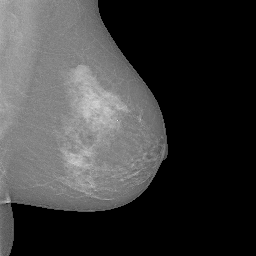

In [ ]:
img

In [ ]:
features = data.drop(columns = 'cancer')
label = data[['cancer']]

In [ ]:
print(features.shape)
print(label.shape)

(54706, 14)
(54706, 1)


##Downsampling dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
features_rus, label_rus = rus.fit_resample(features, label)

print(features_rus.shape)
print(label_rus.shape)
features_rus.info()

(2316, 14)
(2316, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  2316 non-null   int64  
 1   patient_id               2316 non-null   int64  
 2   image_id                 2316 non-null   int64  
 3   laterality               2316 non-null   object 
 4   view                     2316 non-null   object 
 5   age                      2316 non-null   float64
 6   biopsy                   2316 non-null   int64  
 7   invasive                 2316 non-null   int64  
 8   BIRADS                   1217 non-null   float64
 9   implant                  2316 non-null   int64  
 10  density                  1311 non-null   object 
 11  machine_id               2316 non-null   int64  
 12  difficult_negative_case  2316 non-null   bool   
 13  patient_id_image_id      2316 non-null   object 
dtypes: 

In [ ]:
data_1 = pd.concat([features_rus,label_rus],axis = 1)

In [ ]:
data_1

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer
0,1,27099,564652979,R,CC,53.0,0,0,1.0,0,C,49,False,27099_564652979,0
1,1,10925,1726416481,L,MLO,47.0,0,0,1.0,0,C,49,False,10925_1726416481,0
2,2,52006,2087336834,R,MLO,55.0,0,0,NaN,0,NaN,21,False,52006_2087336834,0
3,1,59152,1993388187,L,CC,51.0,0,0,NaN,0,C,49,False,59152_1993388187,0
4,1,22359,907140921,L,CC,63.0,0,0,1.0,0,C,93,False,22359_907140921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2,9707,1900919592,R,MLO,56.0,1,1,NaN,0,NaN,21,False,9707_1900919592,1
2312,2,9840,111786935,R,MLO,59.0,1,1,NaN,0,NaN,21,False,9840_111786935,1
2313,2,9840,1559360810,R,CC,59.0,1,1,NaN,0,NaN,21,False,9840_1559360810,1
2314,2,9851,1409270544,L,MLO,58.0,1,0,NaN,0,NaN,48,False,9851_1409270544,1


In [ ]:
feature = data_1.drop(columns = 'cancer')
label = data_1['cancer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=0)

##Mapping Images with Labels 

In [ ]:
datatrain = pd.concat([X_train,y_train],axis = 1)


In [ ]:
datatrain

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer
820,1,54263,739253801,R,MLO,54.0,0,0,1.0,0,B,210,False,54263_739253801,0
1106,2,55657,954928605,L,CC,55.0,0,0,NaN,0,NaN,48,False,55657_954928605,0
1593,1,32057,269202549,R,MLO,55.0,1,1,0.0,0,B,49,False,32057_269202549,1
564,1,20765,944412052,R,MLO,51.0,0,0,NaN,0,D,49,False,20765_944412052,0
294,1,56235,596748437,R,MLO,68.0,0,0,NaN,0,A,49,False,56235_596748437,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,8817,1412732012,R,MLO,49.0,0,0,1.0,0,B,49,False,8817_1412732012,0
1731,2,38946,808034784,R,MLO,64.0,1,1,NaN,0,NaN,29,False,38946_808034784,1
763,2,46784,1401591263,R,MLO,74.0,0,0,NaN,0,NaN,48,False,46784_1401591263,0
835,2,10025,1365269360,L,MLO,75.0,0,0,NaN,0,NaN,29,False,10025_1365269360,0


In [ ]:
datatrain['image_png'] = datatrain['image_id'].astype('str')+'.png'

In [ ]:
datatrain['image_name'] = datatrain['patient_id'].astype(str)+"_"+datatrain['image_png'].astype(str)

In [ ]:
datatrain

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer,image_png,image_name
820,1,54263,739253801,R,MLO,54.0,0,0,1.0,0,B,210,False,54263_739253801,0,739253801.png,54263_739253801.png
1106,2,55657,954928605,L,CC,55.0,0,0,NaN,0,NaN,48,False,55657_954928605,0,954928605.png,55657_954928605.png
1593,1,32057,269202549,R,MLO,55.0,1,1,0.0,0,B,49,False,32057_269202549,1,269202549.png,32057_269202549.png
564,1,20765,944412052,R,MLO,51.0,0,0,NaN,0,D,49,False,20765_944412052,0,944412052.png,20765_944412052.png
294,1,56235,596748437,R,MLO,68.0,0,0,NaN,0,A,49,False,56235_596748437,0,596748437.png,56235_596748437.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,8817,1412732012,R,MLO,49.0,0,0,1.0,0,B,49,False,8817_1412732012,0,1412732012.png,8817_1412732012.png
1731,2,38946,808034784,R,MLO,64.0,1,1,NaN,0,NaN,29,False,38946_808034784,1,808034784.png,38946_808034784.png
763,2,46784,1401591263,R,MLO,74.0,0,0,NaN,0,NaN,48,False,46784_1401591263,0,1401591263.png,46784_1401591263.png
835,2,10025,1365269360,L,MLO,75.0,0,0,NaN,0,NaN,29,False,10025_1365269360,0,1365269360.png,10025_1365269360.png


In [ ]:
# import pandas as pd
# import os

# # Read CSV file
# # df = pd.read_csv('train.csv')
# # patient_id_image_id = df['patient_id_image_id']
# # cancer_label = df['cancer']
# sample = {}
# # Loop through rows in the CSV file
# for index, row in data_1.iterrows():
#     patient_id_image_id = row.loc['patient_id_image_id']
#     cancer_label = row.loc['cancer']
    
#     # Extract label from patient_id_image_id
#     label = patient_id_image_id
    
#     # List image files
#     image_dir = '/content/'
#     image_files = os.listdir(image_dir)
#     for image_file in image_files:
#         if label in image_file:
#             # Match found, assign cancer label to image
#             # print(f"Match found: {patient_id_image_id} -> {image_file}")
#             # print(f"Cancer label: {cancer_label}")
#             sample[image_file] = cancer_label

        
#             # You can perform further processing or store the cancer label for the matched image as needed

In [ ]:
image_labels = dict(zip(datatrain['image_name'], datatrain['cancer']))

In [ ]:
image_labels

{'54263_739253801.png': 0,
 '55657_954928605.png': 0,
 '32057_269202549.png': 1,
 '20765_944412052.png': 0,
 '56235_596748437.png': 0,
 '31810_2105151156.png': 0,
 '44975_1577012120.png': 0,
 '43949_799060783.png': 0,
 '28936_1362919630.png': 1,
 '4021_1464731172.png': 0,
 '2346_1931036504.png': 1,
 '10243_1716961366.png': 0,
 '33594_77581347.png': 1,
 '27034_682602673.png': 0,
 '61520_1014173232.png': 0,
 '48230_386832097.png': 1,
 '14796_618672779.png': 0,
 '5444_29665687.png': 1,
 '17599_264631518.png': 0,
 '106_76321767.png': 1,
 '32344_1303739980.png': 0,
 '1114_1085717059.png': 0,
 '6637_55676960.png': 1,
 '27691_502799706.png': 0,
 '28344_1940528865.png': 1,
 '42639_1576059714.png': 0,
 '40576_291976928.png': 1,
 '2133_267266091.png': 1,
 '7339_178035245.png': 1,
 '18316_1571104710.png': 1,
 '33588_409921956.png': 1,
 '12725_1297379916.png': 1,
 '53358_2022548083.png': 1,
 '28775_846076599.png': 0,
 '64534_453797042.png': 1,
 '4455_1262354941.png': 0,
 '4202_1775490159.png': 1,


In [ ]:
from PIL import Image
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, image_labels, transform=None):
        self.image_labels = image_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_labels)

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = self.image_labels[index].get(image_file, -1) 
    #     if label == -1:
    #         # Handle key not found error
    #         print(f"Key not found for image file: {image_file}")
    #         return None       

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = list(self.image_labels[index].values())[0] 


    def __getitem__(self, index):
        image_file = list(self.image_labels.keys())[index]  # Get image file name
        label = list(self.image_labels.values())[index] 


        # Load and preprocess the image
        image = Image.open(image_file)
        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [ ]:
from torchvision import transforms

# Define image transformation pipeline
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize image to (256, 256)
    transforms.ToTensor(),  # Convert image to torch.Tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize image
])

In [ ]:
dataset = CustomDataset(image_labels, transform=None)

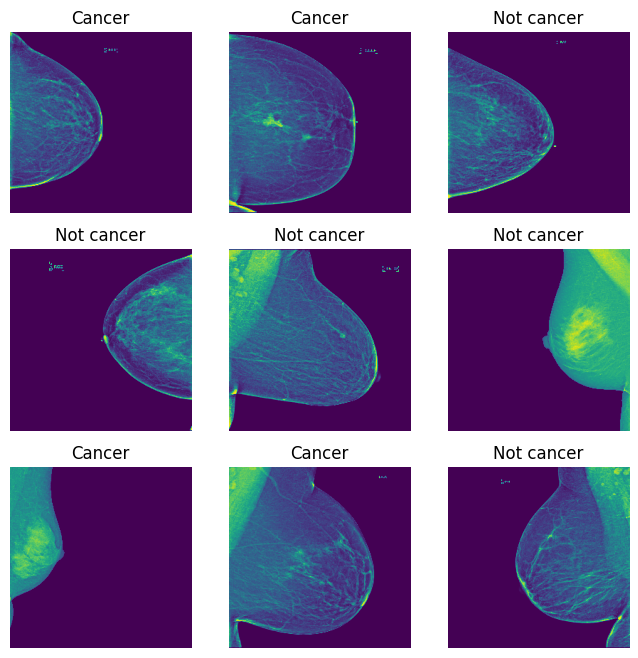

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
torch.manual_seed(0)
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(ENCODING_TO_LABELS[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [ ]:
dataset = CustomDataset(image_labels, transform=transform)

##create trainloader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
# Create a data loader
trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# import pandas as pd
# import os

# # Read CSV file
# # df = pd.read_csv('train.csv')
# # patient_id_image_id = df['patient_id_image_id']
# # cancer_label = df['cancer']
# sample = {}
# # Loop through rows in the CSV file
# for index, row in data_1.iterrows():
#     patient_id_image_id = row.loc['patient_id_image_id']
#     cancer_label = row.loc['cancer']
    
#     # Extract label from patient_id_image_id
#     label = patient_id_image_id
    
#     # List image files
#     image_dir = '/content/'
#     image_files = os.listdir(image_dir)
#     for image_file in image_files:
#         if label in image_file:
#             # Match found, assign cancer label to image
#             # print(f"Match found: {patient_id_image_id} -> {image_file}")
#             # print(f"Cancer label: {cancer_label}")
#             sample[image_file] = cancer_label

        
#             # You can perform further processing or store the cancer label for the matched image as needed

## Create test_loader

In [ ]:
datatest = pd.concat([X_test,y_test],axis = 1)

In [ ]:
datatest

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer
2158,1,61490,1740071540,R,MLO,53.0,1,1,0.0,0,C,49,False,61490_1740071540,1
563,1,4865,1668840015,L,CC,67.0,0,0,0.0,0,B,49,True,4865_1668840015,0
789,2,9063,318748121,L,MLO,75.0,0,0,NaN,0,NaN,21,False,9063_318748121,0
1326,2,18316,547408127,R,CC,60.0,1,1,NaN,0,NaN,48,False,18316_547408127,1
570,1,8272,1352620370,L,MLO,72.0,0,0,NaN,0,B,49,False,8272_1352620370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2,26435,1838173778,L,CC,57.0,0,0,NaN,0,NaN,29,False,26435_1838173778,0
187,2,35977,34797027,L,CC,68.0,1,0,NaN,0,NaN,48,True,35977_34797027,0
2264,1,7339,152254694,L,MLO,73.0,1,1,0.0,0,C,49,False,7339_152254694,1
893,1,6442,1075614696,L,MLO,48.0,1,0,0.0,0,D,49,True,6442_1075614696,0


In [ ]:
datatest['image_png'] = datatest['image_id'].astype('str')+'.png'

In [ ]:
datatest['image_name'] = datatest['patient_id'].astype(str)+"_"+datatest['image_png'].astype(str)

In [ ]:
image_labels_test = dict(zip(datatest['image_name'], datatest['cancer']))

In [ ]:
image_labels_test

{'61490_1740071540.png': 1,
 '4865_1668840015.png': 0,
 '9063_318748121.png': 0,
 '18316_547408127.png': 1,
 '8272_1352620370.png': 0,
 '25178_1215035771.png': 1,
 '46225_1857969319.png': 1,
 '46095_2141709197.png': 1,
 '60964_2000437485.png': 1,
 '43595_2979828.png': 1,
 '15573_1644388791.png': 0,
 '6757_652063876.png': 0,
 '55879_1472857392.png': 1,
 '37163_1351450930.png': 1,
 '1357_553589978.png': 0,
 '50511_1246596360.png': 0,
 '9795_1303576207.png': 0,
 '58663_1261226376.png': 0,
 '65292_1854601436.png': 0,
 '54952_2000484525.png': 0,
 '826_343058323.png': 1,
 '48437_1163631200.png': 1,
 '48609_396716655.png': 0,
 '4888_1456539286.png': 1,
 '40774_1246979925.png': 1,
 '11768_2059991431.png': 0,
 '27275_103461181.png': 1,
 '48568_1016410237.png': 0,
 '25836_837230566.png': 0,
 '56491_734300452.png': 1,
 '58656_2083345164.png': 0,
 '19486_886797800.png': 1,
 '35997_1734628259.png': 0,
 '10342_430541765.png': 0,
 '48725_109927469.png': 0,
 '1410_69796723.png': 0,
 '50078_236729039.p

In [ ]:
from PIL import Image
import torch
from torch.utils.data import Dataset

class CustomDataset_test(Dataset):
    def __init__(self, image_labels, transform=None):
        self.image_labels = image_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_labels)

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = self.image_labels[index].get(image_file, -1) 
    #     if label == -1:
    #         # Handle key not found error
    #         print(f"Key not found for image file: {image_file}")
    #         return None       

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = list(self.image_labels[index].values())[0] 


    def __getitem__(self, index):
        image_file = list(self.image_labels.keys())[index]  # Get image file name
        label = list(self.image_labels.values())[index] 


        # Load and preprocess the image
        image = Image.open(image_file)
        if self.transform is not None:
            image = self.transform(image)

        return image, label

##Normalize Images - Transform

In [ ]:
from torchvision import transforms

# Define image transformation pipeline
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize image to (256, 256)
    transforms.ToTensor(),  # Convert image to torch.Tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize image
])

In [ ]:
dataset_test = CustomDataset_test(image_labels_test, transform=transform)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
# Create a data loader
testloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

#Modeling

## CNN Baseline - size 32x32x1, 2 conv, 2 fully connected

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: complete the constructor of the CNN class
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=32, kernel_size=5)
        #self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels=64, kernel_size=5)
        self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(kernel_size = 2)
        self.flatten = nn.Flatten(start_dim=1)
        self.fc1 = nn.Linear(in_features = 5 * 5 * 64, out_features=128)
        self.fc2 = nn.Linear(in_features = 128, out_features=2)

       
        # END TODO
    
    def forward(self, x):
        # TODO: Implement the forward() method of the CNN class
        outputs = self.mp(self.relu(self.conv1(x)))
        outputs = self.mp(self.relu(self.conv2(outputs)))
        outputs = self.flatten(outputs)
        outputs = self.fc1(outputs)
        outputs = self.relu(outputs)
        outputs = self.fc2(outputs)
        #return x
      

        # END TODO
        return outputs

In [ ]:
# 1. Set the criterion to be cross entropy loss

cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
# # 2. Experiment with different optimizers
# optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

train_loss= []
test_loss = []
train_acc = []
test_acc = []

train_acc_plt = []
test_acc_plt = []

In [ ]:
num_epochs = 35

for epoch in range(num_epochs):
    cnn.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = correct / total
    train_acc_plt.append(train_acc)
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' %
          (epoch + 1, train_loss, train_acc))

    # Test the model
    cnn.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = cnn(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_acc = correct / total
    test_acc_plt.append(test_acc)
    print('Test Accuracy: %.4f' % (test_acc))

Epoch: 1 | Loss: 0.6929 | Train Accuracy: 0.5130
Test Accuracy: 0.5112
Epoch: 2 | Loss: 0.6871 | Train Accuracy: 0.5466
Test Accuracy: 0.5026
Epoch: 3 | Loss: 0.6842 | Train Accuracy: 0.5478
Test Accuracy: 0.5130
Epoch: 4 | Loss: 0.6836 | Train Accuracy: 0.5553
Test Accuracy: 0.5164
Epoch: 5 | Loss: 0.6790 | Train Accuracy: 0.5599
Test Accuracy: 0.5216
Epoch: 6 | Loss: 0.6777 | Train Accuracy: 0.5669
Test Accuracy: 0.5164
Epoch: 7 | Loss: 0.6794 | Train Accuracy: 0.5518
Test Accuracy: 0.5337
Epoch: 8 | Loss: 0.6762 | Train Accuracy: 0.5547
Test Accuracy: 0.5233
Epoch: 9 | Loss: 0.6775 | Train Accuracy: 0.5675
Test Accuracy: 0.5458
Epoch: 10 | Loss: 0.6748 | Train Accuracy: 0.5657
Test Accuracy: 0.5043
Epoch: 11 | Loss: 0.6735 | Train Accuracy: 0.5599
Test Accuracy: 0.5078
Epoch: 12 | Loss: 0.6746 | Train Accuracy: 0.5686
Test Accuracy: 0.5337
Epoch: 13 | Loss: 0.6716 | Train Accuracy: 0.5796
Test Accuracy: 0.5216
Epoch: 14 | Loss: 0.6693 | Train Accuracy: 0.5721
Test Accuracy: 0.5060
E

In [ ]:
# %%time
# # Sending the data to device (CPU or GPU)
# # TODO
# cnn = CNN().to(device)
# criterion = nn.CrossEntropyLoss()
# # END TODO
# optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
# epoch = 40

# acc_LIST_CNN = []
# loss_LIST_CNN = []

# # Train the CNN
# for epoch in range(epoch):
#   running_loss = 0.0
#   correct = 0
#   total = 0
#   for inputs, labels in trainloader:
#       labels = labels.type(torch.LongTensor) # Cast to Float
#       inputs, labels = inputs.to(device), labels.to(device)
#       # TODO: complete the body of this for-loop
#       outputs = cnn(inputs)
#       optimizer.zero_grad()
#       loss = criterion(outputs, labels)
#       loss.backward()
#       optimizer.step()
#       running_loss += loss.item()
#       _, predicted = torch.max(outputs, 1)
#       total += labels.size(0)
#       correct += (predicted == labels).sum().item()


      
      
#   accuracy = (correct/total)# Calculate Trining Acc
#   acc_LIST_CNN.append(accuracy)
#   loss_LIST_CNN.append(running_loss / len(trainloader)) # get the avg loss for each epoch
  
#   # END TODO
#   # print statistics
#   print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(trainloader), accuracy))

###Plot Training Accuracy

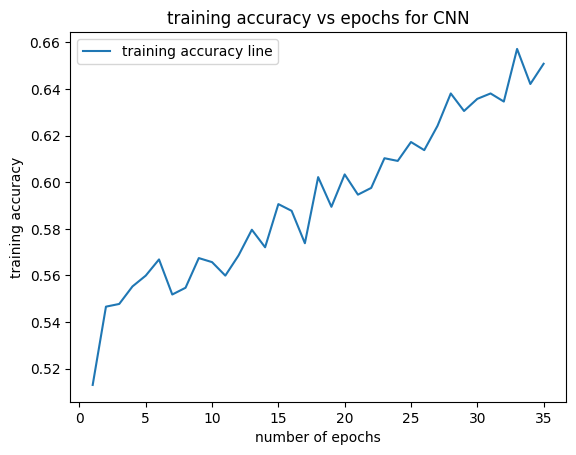

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
y = train_acc_plt
x = np.arange(1,36)
plt.plot(x,y,label='training accuracy line')
plt.title("training accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("training accuracy")
plt.legend()
# END TODO 

###Plot Testing accuracy

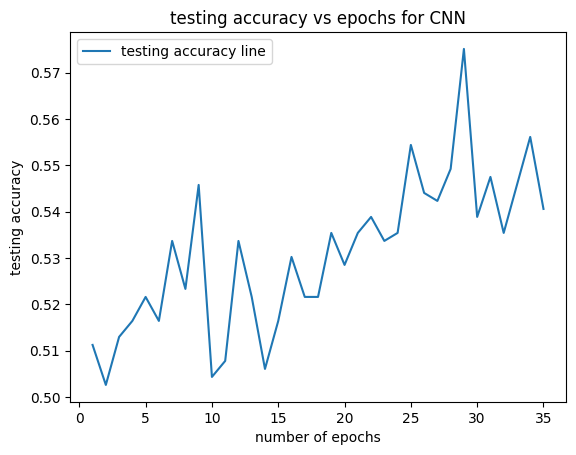

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
y = test_acc_plt
x = np.arange(1,36)
plt.plot(x,y,label='testing accuracy line')
plt.title("testing accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("testing accuracy")
plt.legend()
# END TODO 

In [ ]:
# # TODO
# total = 0
# correct = 0

# with torch.no_grad():
#     for images, labels in testloader:
#         labels = labels.type(torch.LongTensor) # Cast to Float
#         images, labels = images.to(device), labels.to(device)
#         # TODO
#         outputs = cnn(images)
#         _, predicted = torch.max(outputs.data, 1) # use max to get the prediction
#         total += labels.size(0)
#         correct += (predicted == labels).sum()

        
# test_acc_CNN = correct/total*100
# # END TODO
# print(f'Test Accuracy: ' + str(test_acc_CNN.item()))

Test Accuracy: 55.094993591308594


#Keep the original size 256 x 256 and 3 conv, 3 fully connected - Imputation - horizontal flip

In [ ]:
from torchvision import transforms

# Define image transformation pipeline
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    # transforms.Resize((256, 32)),  # Resize image to (256, 256)
    transforms.ToTensor(),  # Convert image to torch.Tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize image
])

In [ ]:
dataset = CustomDataset(image_labels, transform=transform)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
# Create a data loader
trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
dataset_test = CustomDataset_test(image_labels_test, transform=transform)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
# Create a data loader
testloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: complete the constructor of the CNN class
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=32, kernel_size=5) #252
        #self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(kernel_size = 2) #126
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels=64, kernel_size=5) #122
        self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(kernel_size = 2) #61
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels=128, kernel_size=5) #58
        self.mp = nn.MaxPool2d(kernel_size = 2) #29
        self.conv4 = nn.Conv2d(in_channels = 128, out_channels=256, kernel_size=5) #25
        self.relu = nn.ReLU() 
        self.mp = nn.MaxPool2d(kernel_size = 2) #12              
        self.flatten = nn.Flatten(start_dim=1)
        self.fc1 = nn.Linear(in_features = 12 * 12 * 256, out_features=256)
        self.fc2 = nn.Linear(in_features = 256, out_features=128)        
        self.fc3 = nn.Linear(in_features = 128, out_features=2)

       
        # END TODO
    
    def forward(self, x):
        # TODO: Implement the forward() method of the CNN class
        outputs = self.mp(self.relu(self.conv1(x)))
        outputs = self.mp(self.relu(self.conv2(outputs)))
        outputs = self.mp(self.relu(self.conv3(outputs)))
        outputs = self.mp(self.relu(self.conv4(outputs)))         
        outputs = self.flatten(outputs)
        outputs = self.fc1(outputs)
        outputs = self.relu(outputs)
        outputs = self.fc2(outputs)
        outputs = self.relu(outputs)
        outputs = self.fc3(outputs)               
        #return x
      

        # END TODO
        return outputs

In [ ]:
# 1. Set the criterion to be cross entropy loss

cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
# END TODO
optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
# # 2. Experiment with different optimizers
# optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

train_loss= []
test_loss = []
train_acc = []
test_acc = []

train_acc_plt = []
test_acc_plt = []

In [ ]:
num_epochs = 35

for epoch in range(num_epochs):
    cnn.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = correct / total
    train_acc_plt.append(train_acc)
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' %
          (epoch + 1, train_loss, train_acc))

    # Test the model
    cnn.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = cnn(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_acc = correct / total
    test_acc_plt.append(test_acc)
    print('Test Accuracy: %.4f' % (test_acc))

Epoch: 1 | Loss: 0.6940 | Train Accuracy: 0.5078
Test Accuracy: 0.5199
Epoch: 2 | Loss: 0.6916 | Train Accuracy: 0.5096
Test Accuracy: 0.5233
Epoch: 3 | Loss: 0.6879 | Train Accuracy: 0.5431
Test Accuracy: 0.5389
Epoch: 4 | Loss: 0.6835 | Train Accuracy: 0.5536
Test Accuracy: 0.5233
Epoch: 5 | Loss: 0.6819 | Train Accuracy: 0.5553
Test Accuracy: 0.5181
Epoch: 6 | Loss: 0.6842 | Train Accuracy: 0.5090
Test Accuracy: 0.5475
Epoch: 7 | Loss: 0.6804 | Train Accuracy: 0.5472
Test Accuracy: 0.5199
Epoch: 8 | Loss: 0.6776 | Train Accuracy: 0.5570
Test Accuracy: 0.5371
Epoch: 9 | Loss: 0.6770 | Train Accuracy: 0.5536
Test Accuracy: 0.5147
Epoch: 10 | Loss: 0.6762 | Train Accuracy: 0.5675
Test Accuracy: 0.5509
Epoch: 11 | Loss: 0.6674 | Train Accuracy: 0.5900
Test Accuracy: 0.5406
Epoch: 12 | Loss: 0.6623 | Train Accuracy: 0.6039
Test Accuracy: 0.5665
Epoch: 13 | Loss: 0.6583 | Train Accuracy: 0.5906
Test Accuracy: 0.5648
Epoch: 14 | Loss: 0.6507 | Train Accuracy: 0.6219
Test Accuracy: 0.5769
E

In [ ]:
# %%time
# # Sending the data to device (CPU or GPU)
# # TODO
# cnn = CNN().to(device)
# criterion = nn.CrossEntropyLoss()
# # END TODO
# optimizer = optim.Adam(cnn.parameters(), lr=1e-4) #lr - learning step
# epoch = 50

# acc_LIST_CNN = []
# loss_LIST_CNN = []

# # Train the CNN
# for epoch in range(epoch):
#   running_loss = 0.0
#   correct = 0
#   total = 0
#   for inputs, labels in trainloader:
#       labels = labels.type(torch.LongTensor) # Cast to Float
#       inputs, labels = inputs.to(device), labels.to(device)
#       # TODO: complete the body of this for-loop
#       outputs = cnn(inputs)
#       optimizer.zero_grad()
#       loss = criterion(outputs, labels)
#       loss.backward()
#       optimizer.step()
#       running_loss += loss.item()
#       _, predicted = torch.max(outputs, 1)
#       total += labels.size(0)
#       correct += (predicted == labels).sum().item()


      
      
#   accuracy = (correct/total)# Calculate Trining Acc
#   acc_LIST_CNN.append(accuracy)
#   loss_LIST_CNN.append(running_loss / len(trainloader)) # get the avg loss for each epoch
  
#   # END TODO
#   # print statistics
#   print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(trainloader), accuracy))

In [ ]:
# dataset_test = CustomDataset_test(image_labels_test, transform=transform)

In [ ]:
# from torch.utils.data import DataLoader
# batch_size = 64
# # Create a data loader
# testloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

## Plot training Accuracy

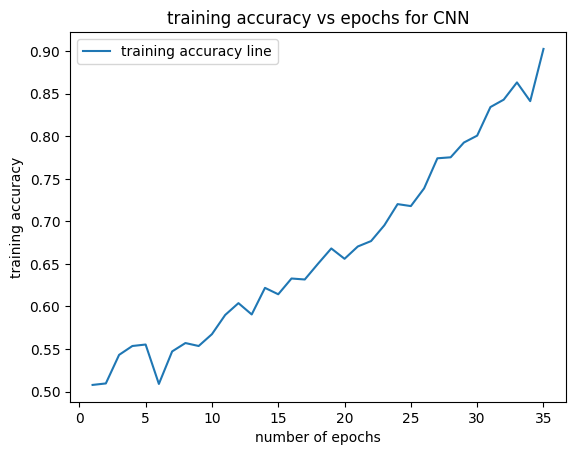

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
y = train_acc_plt
x = np.arange(1,36)
plt.plot(x,y,label='training accuracy line')
plt.title("training accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("training accuracy")
plt.legend()
# END TODO 

## Plot Testing Accuracy

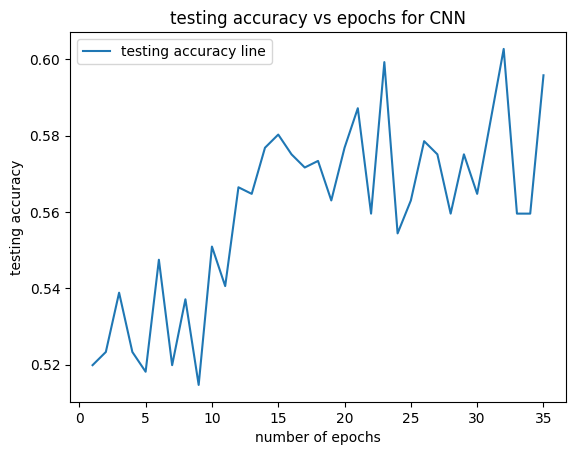

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
y = test_acc_plt
x = np.arange(1,36)
plt.plot(x,y,label='testing accuracy line')
plt.title("testing accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("testing accuracy")
plt.legend()
# END TODO 

#RESNET 101

## transform data

In [ ]:
from torchvision import transforms

# Define image transformation pipeline
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    # transforms.Resize((256, 32)),  # Resize image to (256, 256)
    transforms.ToTensor(),  # Convert image to torch.Tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize image
])

In [ ]:
dataset = CustomDataset(image_labels, transform=transform)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
# Create a data loader
trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
dataset_test = CustomDataset_test(image_labels_test, transform=transform)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
# Create a data loader
testloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

##ResNet101

In [ ]:
model = torchvision.models.resnet101(pretrained=False)

# Modify the first convolutional layer to accept a single channel input
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
train_loss= []
test_loss = []
train_acc = []
test_acc = []

train_acc_plt_res101 = []
test_acc_plt_res101 = []

In [ ]:
num_epochs = 35

for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = correct / total
    train_acc_plt_res101.append(train_acc)
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' %
          (epoch + 1, train_loss, train_acc))

    # Test the model
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(testloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(testloader)
    test_acc = correct / total
    test_acc_plt_res101.append(test_acc)
    print('Test Accuracy: %.4f' % (test_acc))


Epoch: 1 | Loss: 2.1223 | Train Accuracy: 0.4586
Test Accuracy: 0.5199
Epoch: 2 | Loss: 0.7104 | Train Accuracy: 0.5379
Test Accuracy: 0.5544
Epoch: 3 | Loss: 0.6835 | Train Accuracy: 0.5622
Test Accuracy: 0.5302
Epoch: 4 | Loss: 0.6658 | Train Accuracy: 0.5924
Test Accuracy: 0.5527
Epoch: 5 | Loss: 0.6335 | Train Accuracy: 0.6555
Test Accuracy: 0.4922
Epoch: 6 | Loss: 0.6566 | Train Accuracy: 0.6120
Test Accuracy: 0.5199
Epoch: 7 | Loss: 0.6430 | Train Accuracy: 0.6138
Test Accuracy: 0.5648
Epoch: 8 | Loss: 0.5846 | Train Accuracy: 0.6815
Test Accuracy: 0.5199
Epoch: 9 | Loss: 0.5799 | Train Accuracy: 0.6873
Test Accuracy: 0.5112
Epoch: 10 | Loss: 0.5451 | Train Accuracy: 0.7058
Test Accuracy: 0.5389
Epoch: 11 | Loss: 0.5051 | Train Accuracy: 0.7313
Test Accuracy: 0.5320
Epoch: 12 | Loss: 0.4865 | Train Accuracy: 0.7562
Test Accuracy: 0.5475
Epoch: 13 | Loss: 0.4495 | Train Accuracy: 0.7701
Test Accuracy: 0.5509
Epoch: 14 | Loss: 0.4355 | Train Accuracy: 0.7759
Test Accuracy: 0.5492
E

##Plot Training Accuracy

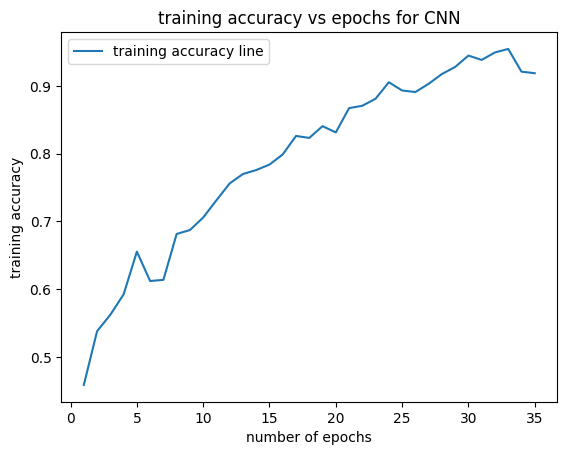

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
y = train_acc_plt_res101
x = np.arange(1,36)
plt.plot(x,y,label='training accuracy line')
plt.title("training accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("training accuracy")
plt.legend()
# END TODO 

## Plot Testing Accuracy

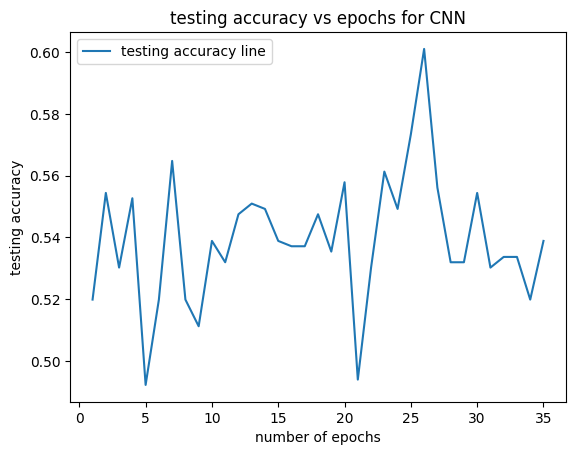

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO
y = test_acc_plt_res101
x = np.arange(1,36)
plt.plot(x,y,label='testing accuracy line')
plt.title("testing accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("testing accuracy")
plt.legend()
# END TODO 

#Try upsampling

In [ ]:
feature = data.drop(columns = 'cancer')
label = data['cancer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.25, random_state=0)

##create trainloader

In [ ]:
datatrain = pd.concat([X_train,y_train],axis = 1)

In [ ]:
datatrain

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer
11852,1,22673,297731185,R,CC,40.0,0,0,1.0,0,B,49,False,22673_297731185,0
8190,2,18762,1626019483,L,CC,61.0,0,0,NaN,0,NaN,21,False,18762_1626019483,0
9634,2,20317,2072160683,L,MLO,50.0,0,0,NaN,0,NaN,21,False,20317_2072160683,0
37081,1,49793,1469420110,L,CC,71.0,0,0,1.0,0,A,49,False,49793_1469420110,0
9673,1,20345,898336604,R,MLO,67.0,0,0,1.0,0,B,49,False,20345_898336604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1,59384,1002424421,L,MLO,77.0,0,0,NaN,0,D,49,False,59384_1002424421,0
52416,1,7445,489824408,R,MLO,67.0,0,0,2.0,0,A,93,False,7445_489824408,0
42613,1,55935,85720891,L,MLO,62.0,0,0,NaN,0,A,49,False,55935_85720891,0
43567,1,56946,761212843,L,CC,74.0,0,0,0.0,0,B,49,True,56946_761212843,0


In [ ]:
datatrain['image_png'] = datatrain['image_id'].astype('str')+'.png'

In [ ]:
datatrain['image_name'] = datatrain['patient_id'].astype(str)+"_"+datatrain['image_png'].astype(str)

In [ ]:
datatrain

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer,image_png,image_name
11852,1,22673,297731185,R,CC,40.0,0,0,1.0,0,B,49,False,22673_297731185,0,297731185.png,22673_297731185.png
8190,2,18762,1626019483,L,CC,61.0,0,0,NaN,0,NaN,21,False,18762_1626019483,0,1626019483.png,18762_1626019483.png
9634,2,20317,2072160683,L,MLO,50.0,0,0,NaN,0,NaN,21,False,20317_2072160683,0,2072160683.png,20317_2072160683.png
37081,1,49793,1469420110,L,CC,71.0,0,0,1.0,0,A,49,False,49793_1469420110,0,1469420110.png,49793_1469420110.png
9673,1,20345,898336604,R,MLO,67.0,0,0,1.0,0,B,49,False,20345_898336604,0,898336604.png,20345_898336604.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1,59384,1002424421,L,MLO,77.0,0,0,NaN,0,D,49,False,59384_1002424421,0,1002424421.png,59384_1002424421.png
52416,1,7445,489824408,R,MLO,67.0,0,0,2.0,0,A,93,False,7445_489824408,0,489824408.png,7445_489824408.png
42613,1,55935,85720891,L,MLO,62.0,0,0,NaN,0,A,49,False,55935_85720891,0,85720891.png,55935_85720891.png
43567,1,56946,761212843,L,CC,74.0,0,0,0.0,0,B,49,True,56946_761212843,0,761212843.png,56946_761212843.png


In [ ]:
image_labels = dict(zip(datatrain['image_name'], datatrain['cancer']))

In [ ]:
from PIL import Image
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, image_labels, transform=None):
        self.image_labels = image_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_labels)

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = self.image_labels[index].get(image_file, -1) 
    #     if label == -1:
    #         # Handle key not found error
    #         print(f"Key not found for image file: {image_file}")
    #         return None       

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = list(self.image_labels[index].values())[0] 


    def __getitem__(self, index):
        image_file = list(self.image_labels.keys())[index]  # Get image file name
        label = list(self.image_labels.values())[index] 


        # Load and preprocess the image
        image = Image.open(image_file)
        if self.transform is not None:
            image = self.transform(image)

        return image, label

##create class weight for upsampling train dataset


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

# Define the transformations to be applied to the images
transform_train = transforms.Compose([
    # transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the imbalanced dataset
# train_dataset = datasets.ImageFolder(root='path/to/dataset', transform=transform_train)
dataset = CustomDataset(image_labels, transform=transform_train)
# Calculate the class frequencies in the dataset
class_counts = np.bincount(list(dataset.image_labels.values()))
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)

# Create a sampler that oversamples the minority class
target_weights = np.array([class_weights[label] for label in dataset.image_labels.values()])
sample_weights = target_weights / target_weights.sum()
sampler = torch.utils.data.sampler.WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

# Create a DataLoader for the training data with the oversampling sampler
batch_size = 128
train_loader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)


##create test loader


In [ ]:
datatest = pd.concat([X_test,y_test],axis = 1)

In [ ]:
datatest

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_id_image_id,cancer
44701,1,58224,132390955,L,CC,50.0,1,0,0.0,0,D,49,True,58224_132390955,0
10998,1,21809,1307476428,R,MLO,56.0,0,0,2.0,0,C,190,False,21809_1307476428,0
44803,1,58351,1689606258,R,CC,40.0,0,0,1.0,0,D,49,False,58351_1689606258,0
47262,1,60826,1465194139,R,MLO,71.0,0,0,1.0,0,B,93,False,60826_1465194139,0
2349,2,1250,1329687627,R,CC,64.0,0,0,NaN,0,NaN,29,False,1250_1329687627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,1,41397,1452644344,R,MLO,40.0,0,0,1.0,0,C,93,False,41397_1452644344,0
1880,1,12027,1550418007,L,MLO,50.0,0,0,1.0,0,B,49,False,12027_1550418007,0
15666,2,26664,1409401831,R,CC,73.0,1,1,NaN,0,NaN,29,False,26664_1409401831,1
20798,2,32071,1890737433,L,CC,50.0,0,0,NaN,0,NaN,48,False,32071_1890737433,0


In [ ]:
datatest['image_png'] = datatest['image_id'].astype('str')+'.png'

In [ ]:
datatest['image_name'] = datatest['patient_id'].astype(str)+"_"+datatest['image_png'].astype(str)

In [ ]:
image_labels_test = dict(zip(datatest['image_name'], datatest['cancer']))

In [ ]:
from PIL import Image
import torch
from torch.utils.data import Dataset

class CustomDataset_test(Dataset):
    def __init__(self, image_labels, transform=None):
        self.image_labels = image_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_labels)

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = self.image_labels[index].get(image_file, -1) 
    #     if label == -1:
    #         # Handle key not found error
    #         print(f"Key not found for image file: {image_file}")
    #         return None       

    # def __getitem__(self, index):
    #     image_file = list(self.image_labels[index].keys())[0]  # Get image file name
    #     label = list(self.image_labels[index].values())[0] 


    def __getitem__(self, index):
        image_file = list(self.image_labels.keys())[index]  # Get image file name
        label = list(self.image_labels.values())[index] 


        # Load and preprocess the image
        image = Image.open(image_file)
        if self.transform is not None:
            image = self.transform(image)

        return image, label

##create class weight for upsampling test dataset

In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

# Define the transformations to be applied to the images
transform_test = transforms.Compose([
    #  transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the imbalanced dataset
# train_dataset = datasets.ImageFolder(root='path/to/dataset', transform=transform_train)
dataset_test = CustomDataset(image_labels_test, transform=transform_test)
# Calculate the class frequencies in the dataset
class_counts = np.bincount(list(dataset_test.image_labels.values()))
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)

# Create a sampler that oversamples the minority class
target_weights = np.array([class_weights[label] for label in dataset_test.image_labels.values()])
sample_weights = target_weights / target_weights.sum()
sampler = torch.utils.data.sampler.WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

# Create a DataLoader for the training data with the oversampling sampler
batch_size = 128
test_loader = DataLoader(dataset_test, batch_size=batch_size, sampler=sampler)


##CNN Model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.bn5 = nn.BatchNorm1d(512)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        
        self.fc2 = nn.Linear(512, 256)
        self.bn6 = nn.BatchNorm1d(256)
        self.relu6 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.5)

        self.fc3 = nn.Linear(256, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool4(x)
        
        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc1(x)
        x = self.bn5(x)
        x = self.relu5(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn6(x)
        x = self.relu6(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.sigmoid(x)
        
        return x
    # def forward(self, xb):
    #     return self.network(xb)

model = CNN().to(device)

In [ ]:
# 1. Set the criterion to be cross entropy loss
criterion = nn.CrossEntropyLoss()

# 2. Experiment with different optimizers
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loss= []
test_loss = []
train_acc = []
test_acc = []

train_acc_plt = []
test_acc_plt = []

In [ ]:
num_epochs = 35

for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_acc_plt.append(train_acc)
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' %
          (epoch + 1, train_loss, train_acc))

    # Test the model
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_acc = correct / total
    test_acc_plt.append(test_acc)
    print('Test Accuracy: %.4f' % (test_acc))


Epoch: 1 | Loss: 0.6500 | Train Accuracy: 0.6166
Test Accuracy: 0.5639
Epoch: 2 | Loss: 0.5778 | Train Accuracy: 0.7128
Test Accuracy: 0.5679
Epoch: 3 | Loss: 0.4974 | Train Accuracy: 0.8044
Test Accuracy: 0.5277
Epoch: 4 | Loss: 0.4409 | Train Accuracy: 0.8669
Test Accuracy: 0.5542
Epoch: 5 | Loss: 0.3958 | Train Accuracy: 0.9150
Test Accuracy: 0.5177
Epoch: 6 | Loss: 0.3716 | Train Accuracy: 0.9409
Test Accuracy: 0.5194


KeyboardInterrupt: ignored

ValueError: ignored

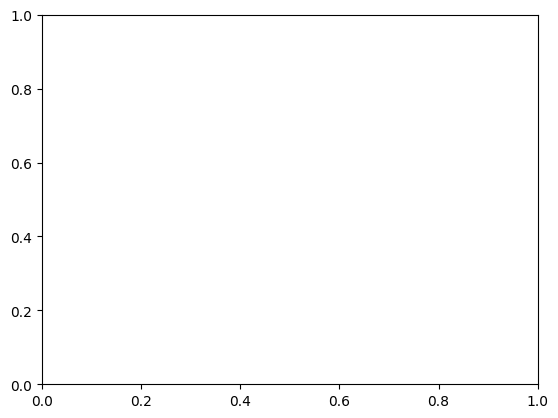

In [ ]:
# TODO
y = train_acc_plt
x = np.arange(1,36)
plt.plot(x,y,label='training accuracy line')
plt.title("training accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("training accuracy")
plt.legend()
# END TODO 

In [ ]:
# TODO
y = test_acc_plt
x = np.arange(1,36)
plt.plot(x,y,label='test accuracy line')
plt.title("test accuracy vs epochs for CNN")
plt.xlabel("number of epochs")
plt.ylabel("test accuracy")
plt.legend()
# END TODO 

Test Accuracy: 55.02668762207031


##RESNET 50

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = nn.Identity()
            
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        identity = self.downsample(x)
        
        out += identity
        out = self.relu(out)
        
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=2):
        super().__init__()
        
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels, 1))
            
        return nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

# instantiate the ResNet model with 4 ResNet blocks and 2 output classes
model = ResNet(ResNetBlock, [2, 2, 2, 2], num_classes=2).to(device)

In [ ]:
# 1. Set the criterion to be cross entropy loss
criterion = nn.CrossEntropyLoss()

# 2. Experiment with different optimizers
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_loss= []
test_loss = []
train_acc = []
test_acc = []

In [ ]:
%%time
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += predicted.eq(labels.data).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100.0 * correct / total

    print('Epoch [%d/%d], Loss: %.4f, Training Accuracy: %.2f %%' % (epoch+1, num_epochs, train_loss, train_acc))

Epoch [1/10], Loss: 0.6914, Training Accuracy: 56.31 %
Epoch [2/10], Loss: 0.6592, Training Accuracy: 61.18 %
Epoch [3/10], Loss: 0.5977, Training Accuracy: 67.65 %
Epoch [4/10], Loss: 0.4984, Training Accuracy: 74.95 %
Epoch [5/10], Loss: 0.4020, Training Accuracy: 81.15 %
Epoch [6/10], Loss: 0.3157, Training Accuracy: 85.96 %
Epoch [7/10], Loss: 0.2583, Training Accuracy: 88.95 %
Epoch [8/10], Loss: 0.2093, Training Accuracy: 91.38 %
Epoch [9/10], Loss: 0.1659, Training Accuracy: 93.65 %
Epoch [10/10], Loss: 0.1426, Training Accuracy: 94.46 %
CPU times: user 14min 42s, sys: 16.6 s, total: 14min 58s
Wall time: 15min 16s


In [ ]:
model.eval()  # switch to evaluation mode
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():  # no need to calculate gradients
    for data in test_loader:
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        test_loss += loss.item()

test_accuracy = 100 * correct / total
test_loss /= len(test_loader)

print('Test Accuracy: {:.2f}%'.format(test_accuracy))
print('Test Loss: {:.4f}'.format(test_loss))

Test Accuracy: 53.16%
Test Loss: 2.4250


##ResNet101

In [ ]:
model = torchvision.models.resnet101(pretrained=False)

# Modify the first convolutional layer to accept a single channel input
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Set up loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' %
          (epoch + 1, train_loss, train_acc))

    # Test the model
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_acc = correct / total

    print('Test Accuracy: %.4f' % (test_acc))

Epoch: 1 | Loss: 0.6645 | Train Accuracy: 0.6543
Test Accuracy: 0.5261
Epoch: 2 | Loss: 0.4201 | Train Accuracy: 0.8155
Test Accuracy: 0.5449
Epoch: 3 | Loss: 0.3268 | Train Accuracy: 0.8630
Test Accuracy: 0.5508
Epoch: 4 | Loss: 0.2525 | Train Accuracy: 0.8945
Test Accuracy: 0.5310
Epoch: 5 | Loss: 0.2227 | Train Accuracy: 0.9084
Test Accuracy: 0.5377
Epoch: 6 | Loss: 0.2134 | Train Accuracy: 0.9135
Test Accuracy: 0.5371
Epoch: 7 | Loss: 0.1832 | Train Accuracy: 0.9279
Test Accuracy: 0.5267
Epoch: 8 | Loss: 0.1612 | Train Accuracy: 0.9367
Test Accuracy: 0.5496
Epoch: 9 | Loss: 0.1530 | Train Accuracy: 0.9420
Test Accuracy: 0.5112
Epoch: 10 | Loss: 0.1543 | Train Accuracy: 0.9444
Test Accuracy: 0.5389
Epoch: 11 | Loss: 0.6397 | Train Accuracy: 0.6459
Test Accuracy: 0.5530
Epoch: 12 | Loss: 0.5965 | Train Accuracy: 0.7064
Test Accuracy: 0.5484
Epoch: 13 | Loss: 0.4229 | Train Accuracy: 0.8076
Test Accuracy: 0.5421
Epoch: 14 | Loss: 0.4153 | Train Accuracy: 0.8123
Test Accuracy: 0.5383
E

In [ ]:
import torch.nn as nn

class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(identity)
        out = self.relu(out)
        return out

class ResNet8(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet8, self).__init__()
        self.in_channels = 16
        self.conv = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(ResNetBlock, 16, 2, stride=1)
        self.layer2 = self._make_layer(ResNetBlock, 32, 2, stride=2)
        self.layer3 = self._make_layer(ResNetBlock, 64, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(self.in_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


##ResNet8

In [ ]:
net = ResNet8(10).to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.1, patience=5)

In [ ]:
EPOCHS = 20
for epoch in range(EPOCHS):
    losses = []
    running_loss = 0
    for i, inp in enumerate(train_loader):
        inputs, labels = inp
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i%100 == 0 and i > 0:
            print(f'Loss [{epoch+1}, {i}](epoch, minibatch): ', running_loss / 100)
            running_loss = 0.0

    avg_loss = sum(losses)/len(losses)
    scheduler.step(avg_loss)
            
print('Training Done')

Loss [1, 100](epoch, minibatch):  0.7397327840328216
Loss [1, 200](epoch, minibatch):  0.6819010484218597
Loss [1, 300](epoch, minibatch):  0.6750499606132507
Loss [2, 100](epoch, minibatch):  0.681318324804306
Loss [2, 200](epoch, minibatch):  0.679421198964119
Loss [2, 300](epoch, minibatch):  0.6779299485683441
Loss [3, 100](epoch, minibatch):  0.6821188288927078
Loss [3, 200](epoch, minibatch):  0.6756967914104461
Loss [3, 300](epoch, minibatch):  0.6657372379302978
Loss [4, 100](epoch, minibatch):  0.6713462924957275
Loss [4, 200](epoch, minibatch):  0.6652523016929627
Loss [4, 300](epoch, minibatch):  0.6538525128364563
Loss [5, 100](epoch, minibatch):  0.6481512582302094
Loss [5, 200](epoch, minibatch):  0.6292516756057739
Loss [5, 300](epoch, minibatch):  0.6118774139881134
Loss [6, 100](epoch, minibatch):  0.5935390761494637
Loss [6, 200](epoch, minibatch):  0.560538360774517
Loss [6, 300](epoch, minibatch):  0.5225950995087624
Loss [7, 100](epoch, minibatch):  0.5027201756834

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy on test images: ', 100*(correct/total), '%')

Accuracy on test images:  55.202164217299114 %
